<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

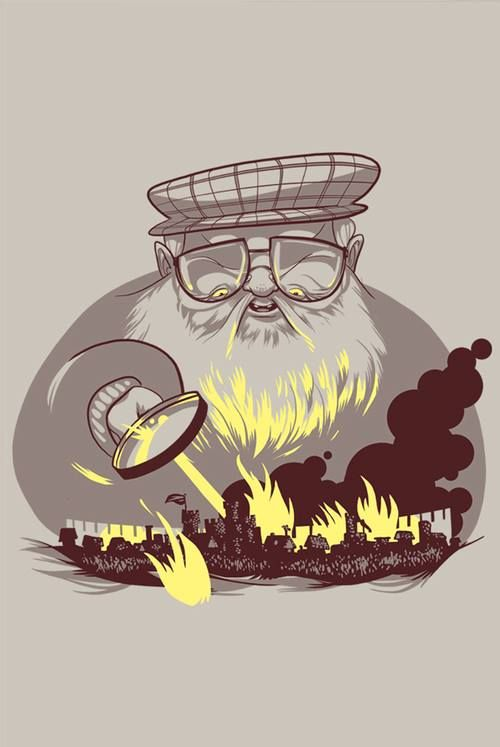

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
#!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
#!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("datasets/game_of_thrones_train.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().mean()

name                0.000000
title               0.539499
male                0.000000
culture             0.682081
dateOfBirth         0.820809
mother              0.988439
father              0.985870
heir                0.986513
house               0.244701
spouse              0.871548
book1               0.000000
book2               0.000000
book3               0.000000
book4               0.000000
book5               0.000000
isAliveMother       0.988439
isAliveFather       0.985870
isAliveHeir         0.986513
isAliveSpouse       0.871548
isMarried           0.000000
isNoble             0.000000
age                 0.820809
numDeadRelations    0.000000
popularity          0.000000
isAlive             0.000000
dtype: float64

* title, culture, house - пропуски заменяем на новую категорию 'Empty'. Также я заметил, что некоторые категория повторяется просто отличаются заглавной буквой, так что я привел все к нижнему регистру.
* age - полезная фича, так что заменяем пропуски на медиану (т.к. она намного стабильнее чем среднее)
* isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse, father, mother, heir, dateOfBirth - слишком разрежено. Поэтому удаляем

In [5]:
data.loc[:, ['title', 'culture', 'house']] = data.loc[:, ['title', 'culture', 'house']].fillna('Empty')
data['title'] = data['title'].str.lower()
data['culture'] = data['culture'].str.lower()
data['house'] = data['house'].str.lower()

data['age'] = data['age'].fillna(data['age'].median())

data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse', 'name', 'dateOfBirth'], inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [6]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [7]:
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
data['cult'] = 'empty'
for cult_name, names in cult.items():
  for possible_name in names:
    data.loc[data['culture'].str.contains(possible_name), 'cult'] = cult_name

Добавим еще призанков. Частота появления house, culture, title, cult.

In [8]:
house_freq = (data.groupby('house').size()) / len(data)
data['freqHouse'] = data['house'].apply(lambda x: house_freq[x])

culture_freq = (data.groupby('culture').size()) / len(data)
data['freqculture'] = data['culture'].apply(lambda x: culture_freq[x])

title_freq = (data.groupby('title').size()) / len(data)
data['freqtitle'] = data['title'].apply(lambda x: title_freq[x])

Количество появления персонажа в книгах - count_in_books. Есть ли слово house в house - is_there_word_house_in_house

In [9]:
data['count_in_books'] = data[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)
data['is_there_word_house_in_house'] = data['house'].str.contains('house').astype(int)

Добавляем среднее, а также кол-во знантных персонажей среди домоа, культур и титулов.

In [10]:
noble_house = data.groupby('house')['isNoble'].agg(mean_noble="mean", sum_noble="sum")
data[['mean_noble_by_house', 'sum_noble_by_house']] = data['house'].apply(lambda x: noble_house.loc[x])

noble_culture = data.groupby('culture')['isNoble'].agg(mean_noble="mean", sum_noble="sum")
data[['mean_noble_by_culture', 'sum_noble_by_culture']] = data['culture'].apply(lambda x: noble_culture.loc[x])

noble_title = data.groupby('title')['isNoble'].agg(mean_noble="mean", sum_noble="sum")
data[['mean_noble_by_title', 'sum_noble_by_title']] = data['title'].apply(lambda x: noble_title.loc[x])

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

<Axes: >

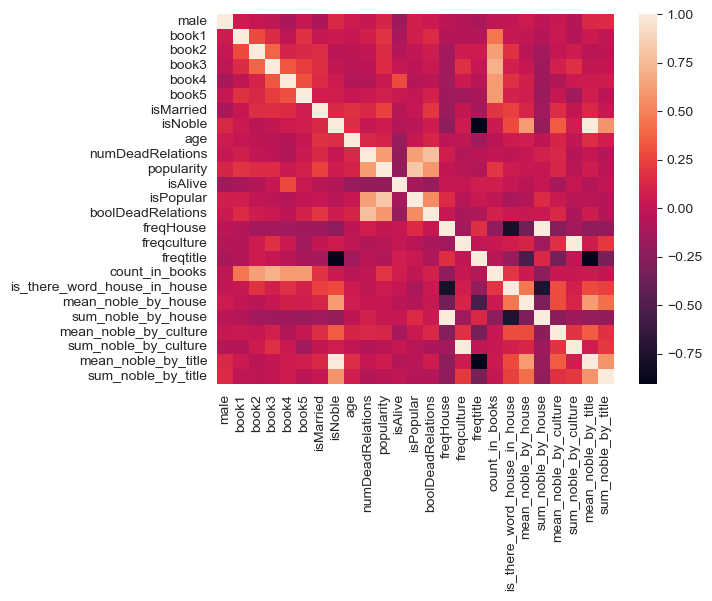

In [11]:
sns.heatmap(data.select_dtypes(include='number').corr())

Мы видим сильную корелляцию между некоторыми признаками, так что я решил удалить mean_noble_by_title, sum_noble_by_culture, sum_noble_by_house

In [12]:
data.drop(columns=['mean_noble_by_title', 'sum_noble_by_culture', 'sum_noble_by_house'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [13]:
data.isAlive.value_counts(normalize=True)

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64

Переменная **isAlive** имеет только два значения и является категориальной (человек или живой, или мертвый). Здесь мы можем увидеть дисбаланс, так как выживших больше тех, кто умер.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

Мы ранее обработали категориальными переменные, а именно посчитали чистотность, а также среднюю благородность. Я считаю такую обработку достаточной, так что я удалю эти колонки.

In [14]:
data.drop(columns=['title', 'culture', 'house', 'cult'], inplace=True)

Как я говорил ранее кореляция межде некоторыми признаками есть. Например, есть корелляция появлениями книг, т.е. вероятность, что персонаж окажется в следующей книге, если был в предыдущей высока.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


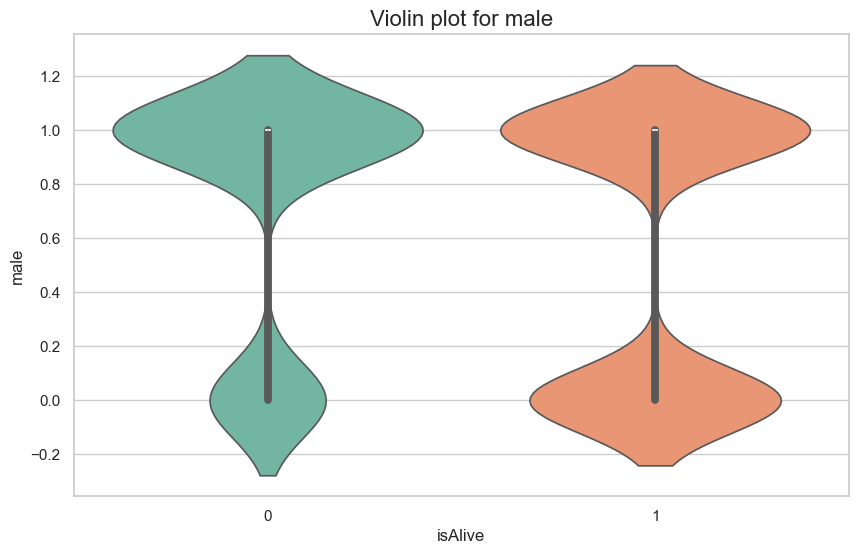

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


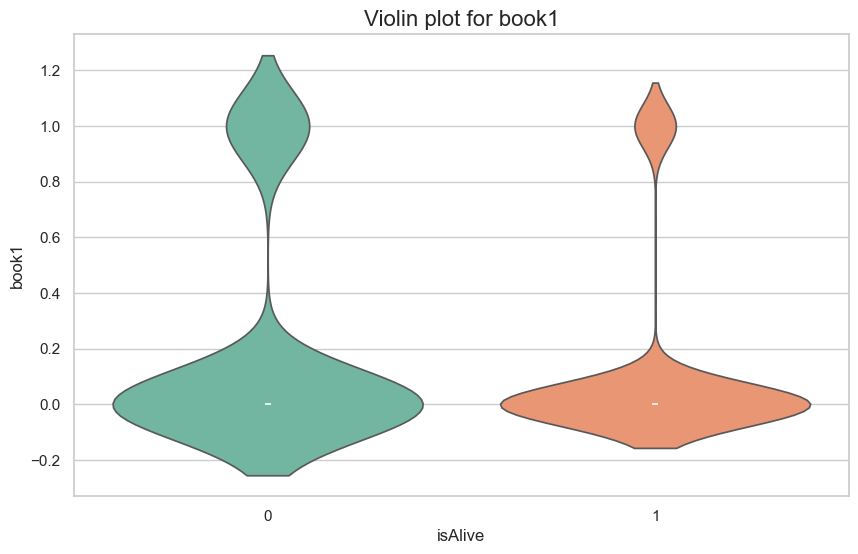

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


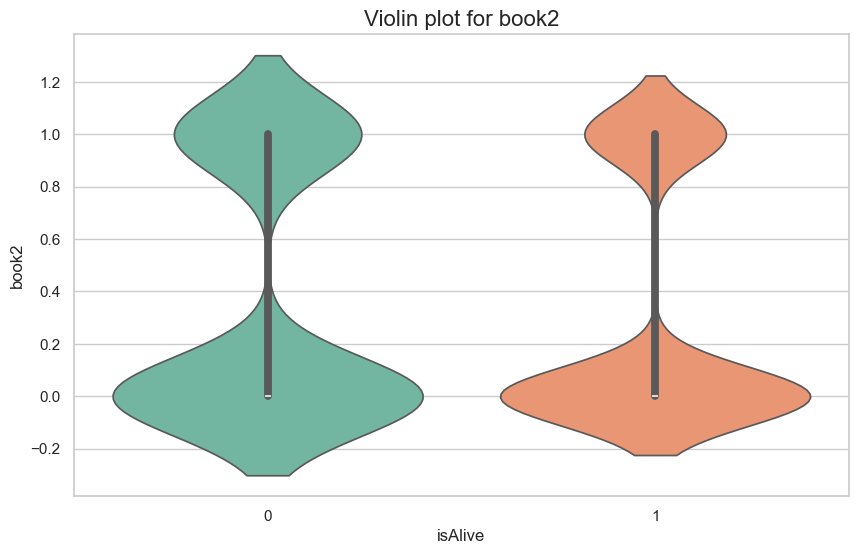

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


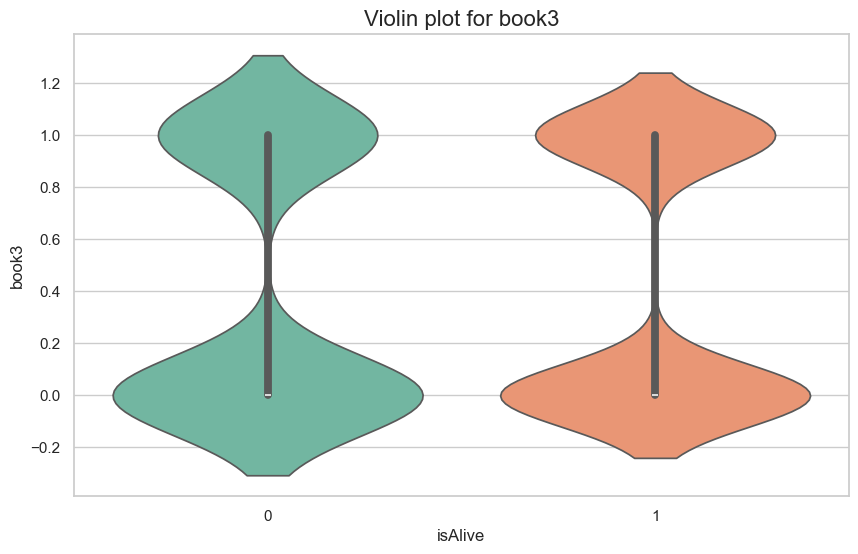

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


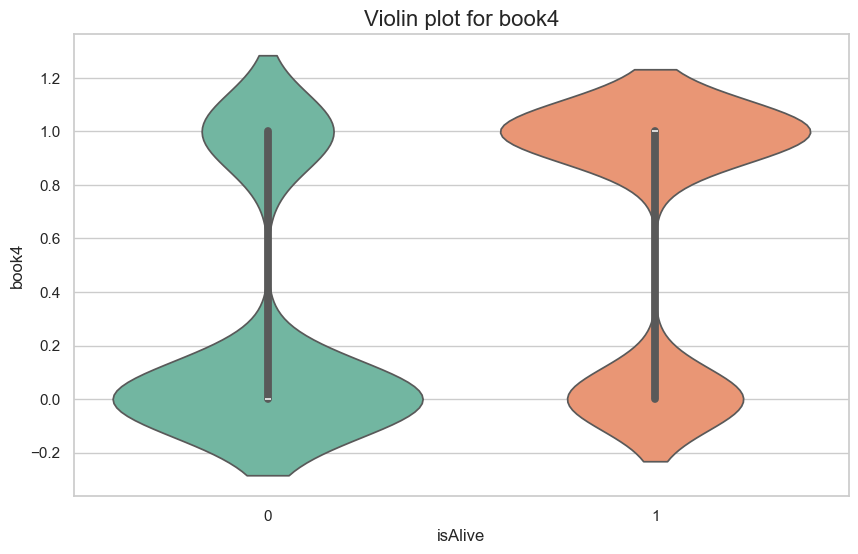

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


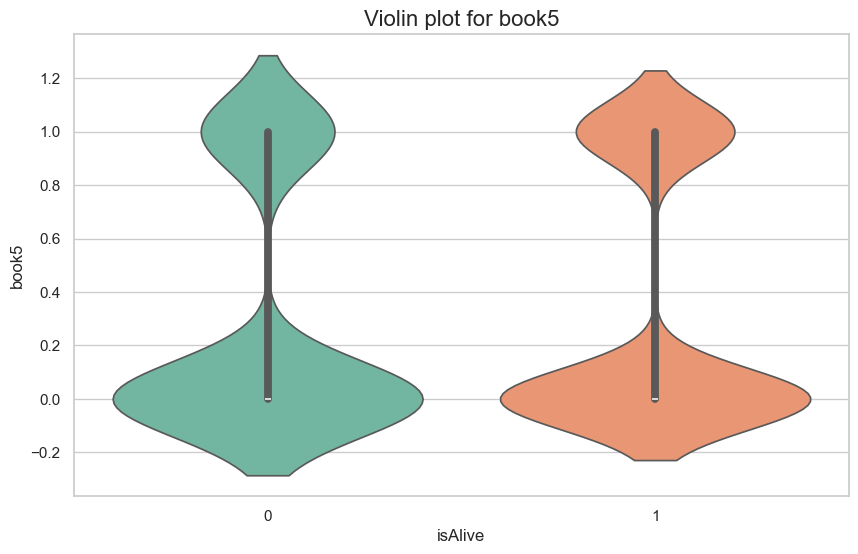

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


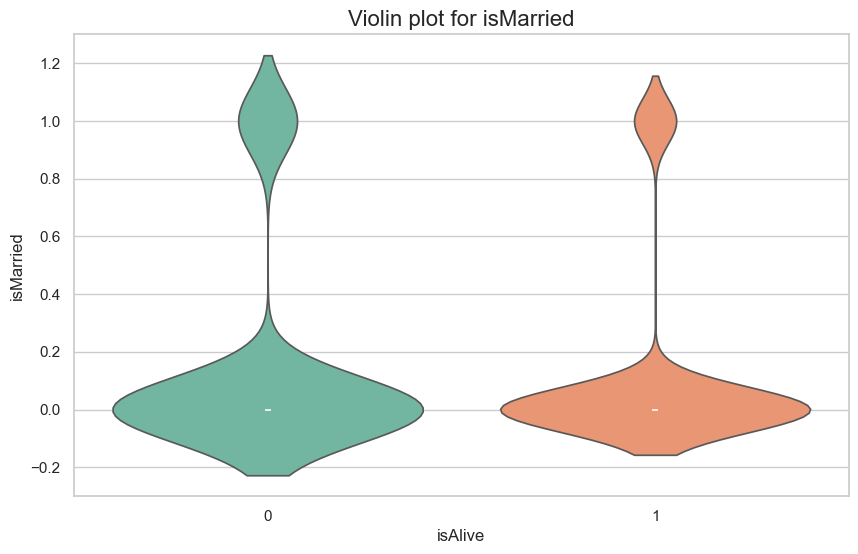

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


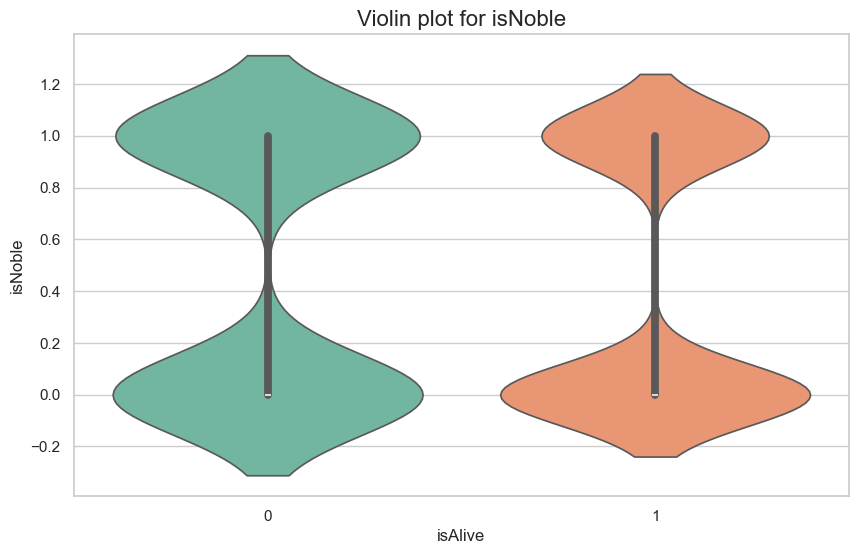

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


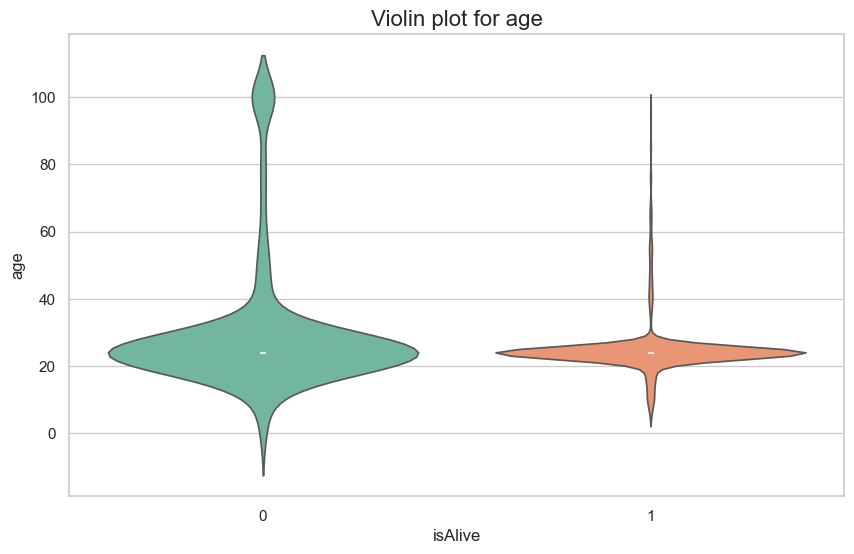

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


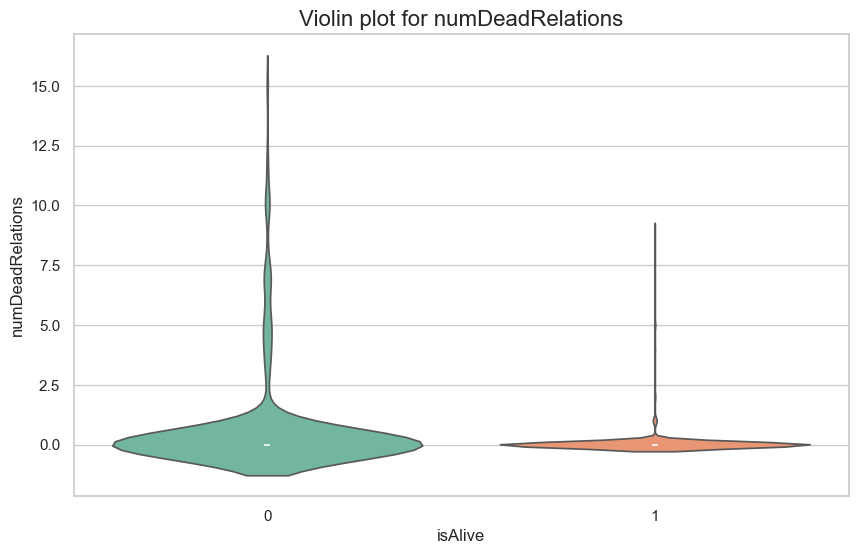

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


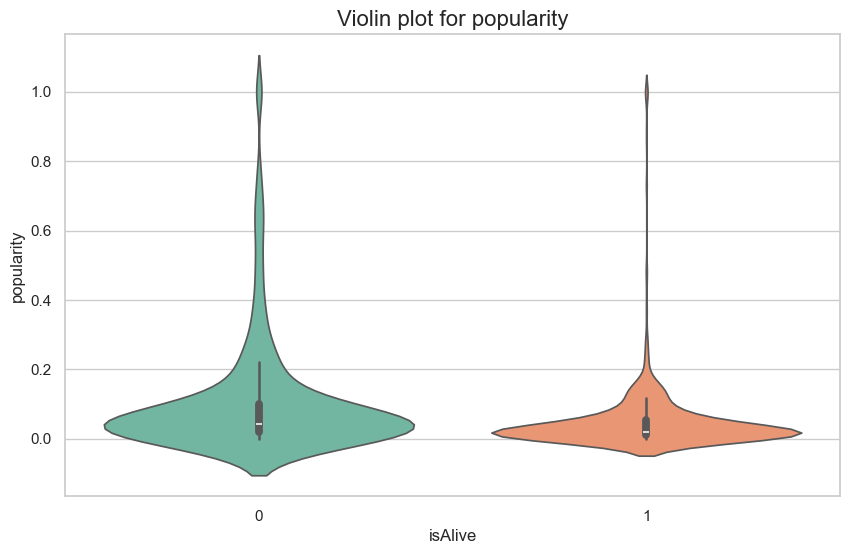

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


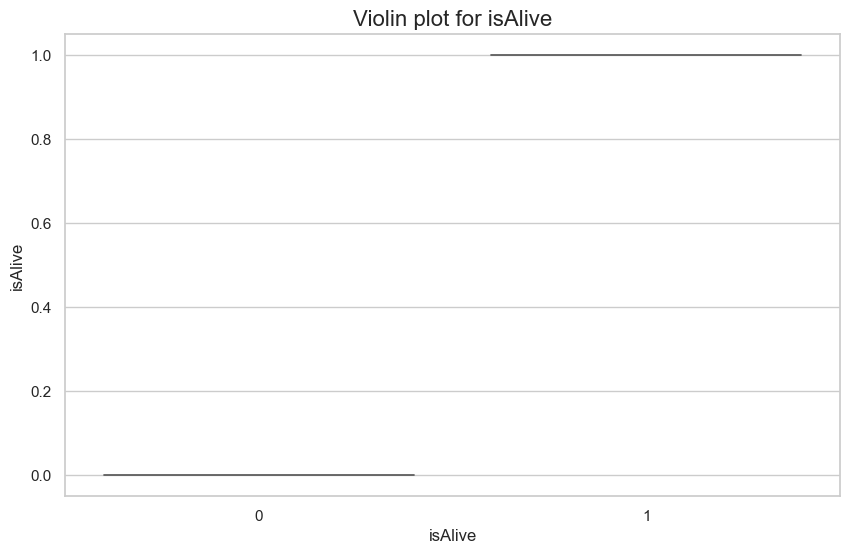

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


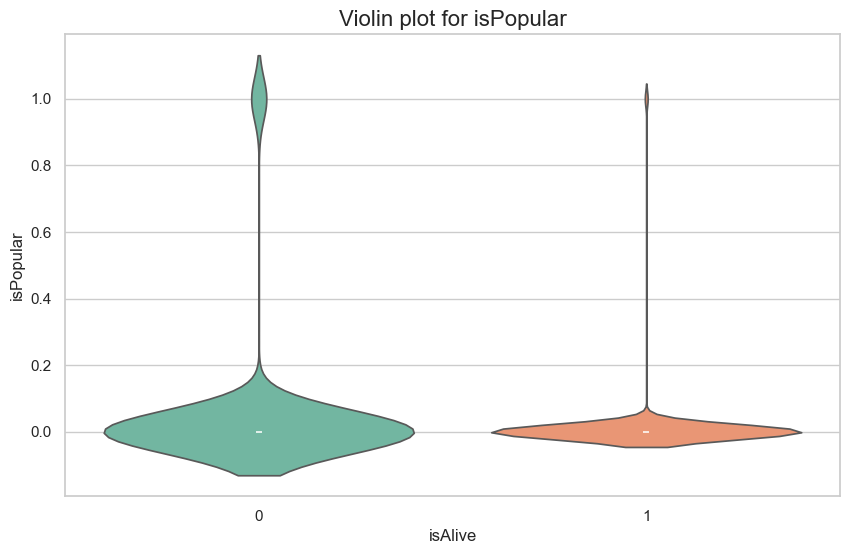

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


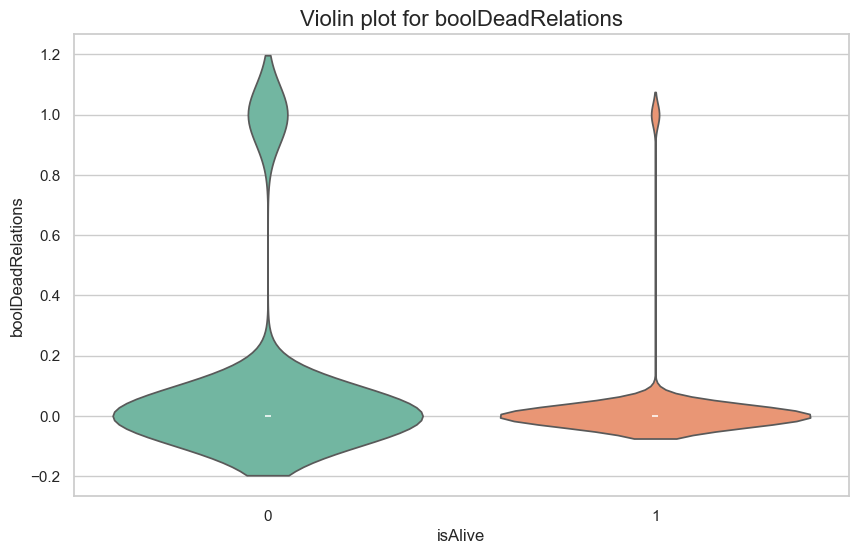

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


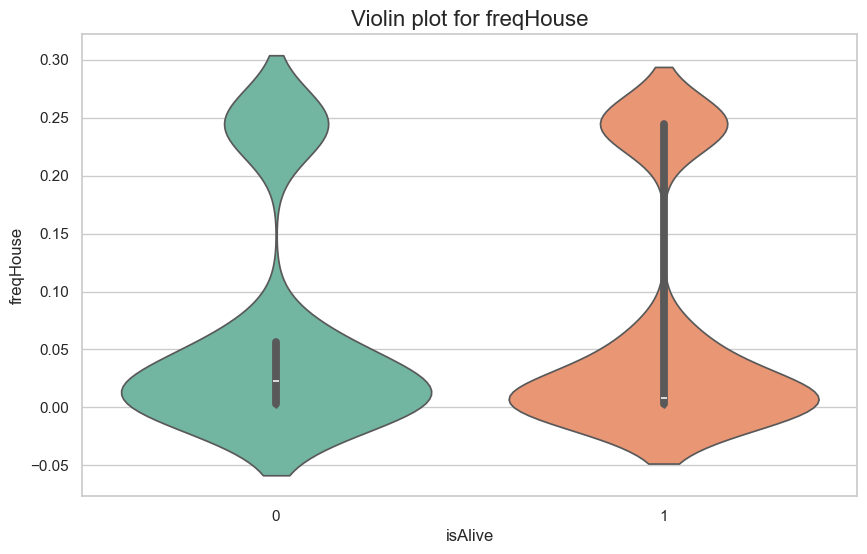

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


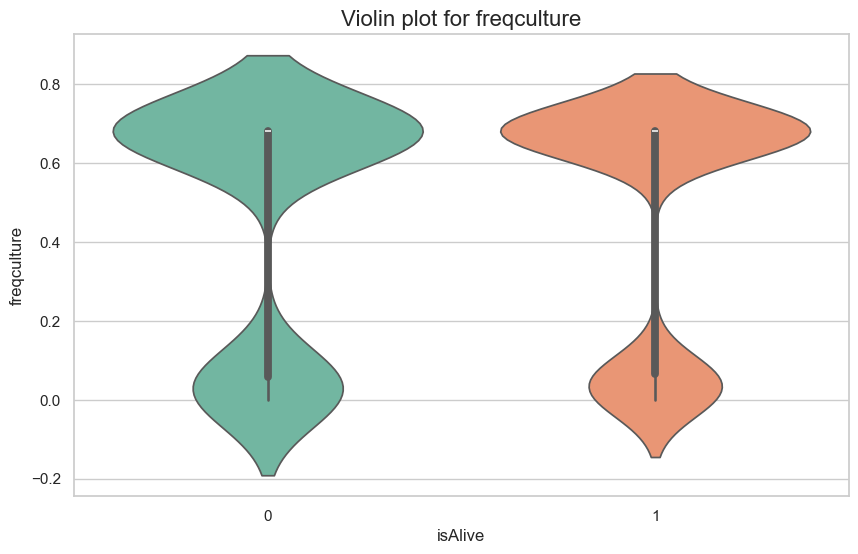

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


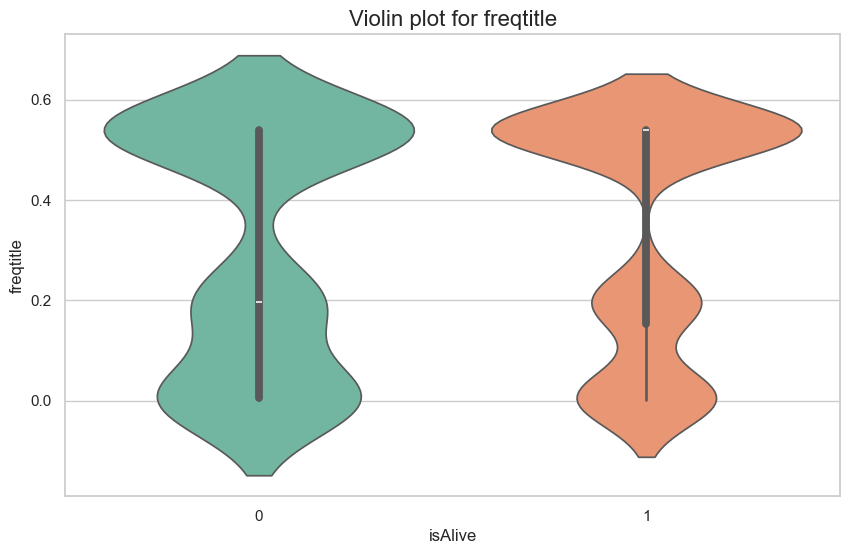

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


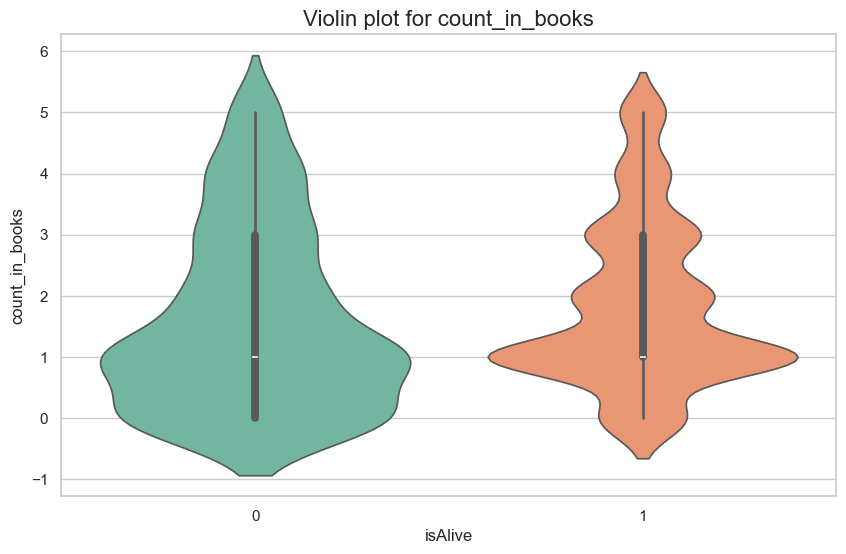

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


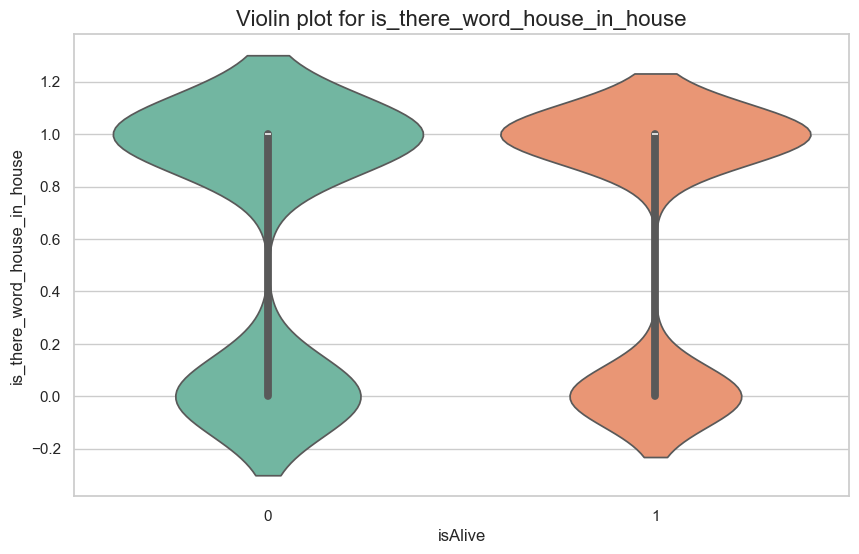

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


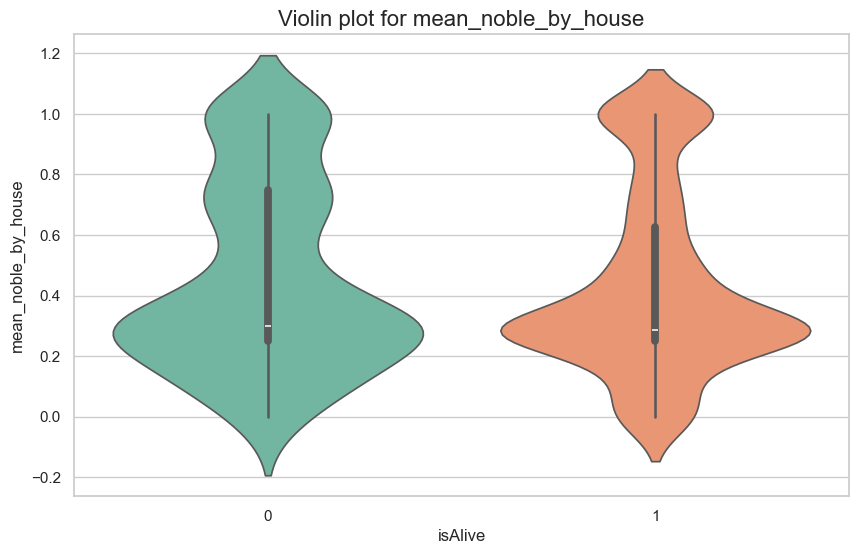

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


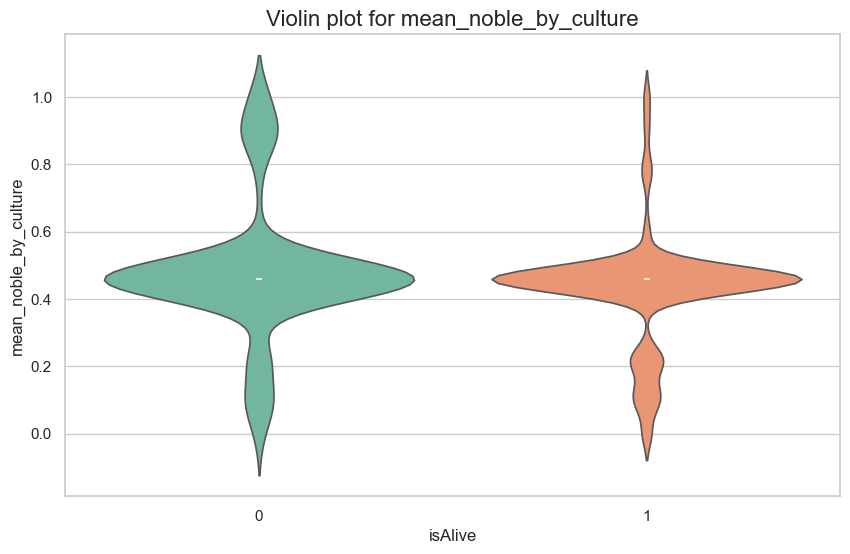

/tmp/ipykernel_22013/3832953707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)


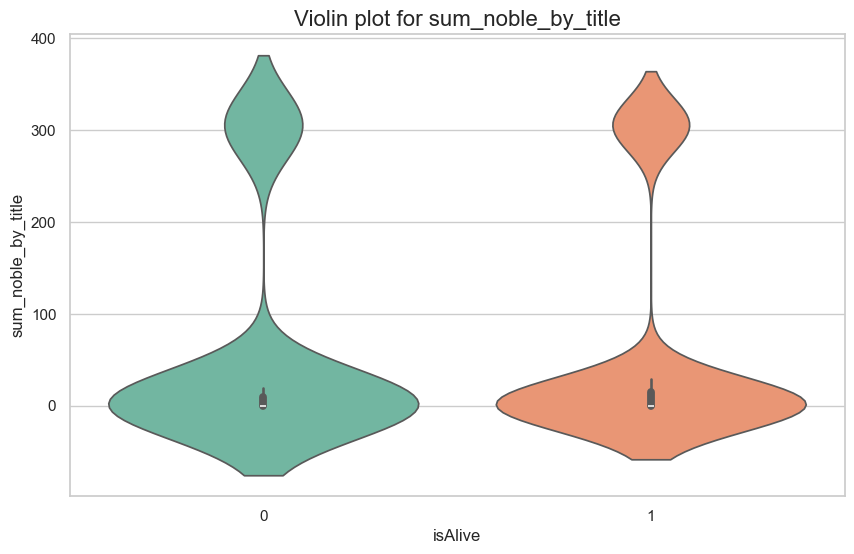

In [15]:
sns.set(style="whitegrid")  
palette = "Set2"  


for x in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 6))  
    sns.violinplot(data=data, x="isAlive", y=x, palette=palette, split=False)
    plt.title(f'Violin plot for {x}', fontsize=16)  
    plt.show()

На первый взгляд разница между ними не слишком отличается. Но, например для перемнной count_in_books мы можем увидеть, что значение больше одного более вероятно живы.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [16]:
X = data.drop(columns='isAlive').copy()
y = data['isAlive'].copy()

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [19]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [20]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [21]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/home/paul/miniconda3/envs/StepikDLS/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [22]:
# Шаг 1. создание модели
models = {
    'random_forest': RandomForestClassifier(n_estimators=1000, max_features=1/3, random_state=0),
    'adaboost': AdaBoostClassifier(n_estimators=1000, learning_rate=0.01, random_state=0),
    'gaussian_process': GaussianProcessClassifier(random_state=0),
    'gaussian_naive': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svc': SVC(random_state=0),
    'decison_tree': DecisionTreeClassifier(random_state=0)
}

# Шаг 2. обучение модели
for _, model in models.items():
  model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
preds = {}
for name, model in models.items():
  preds[name] = model.predict(X_test)

/home/paul/miniconda3/envs/StepikDLS/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [23]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [24]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7853


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [25]:
# Шаг 3. Предсказание на тестовых данных
preds = {}
for name, model in models.items():
  preds[name] = model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
for name, model_preds in preds.items():
  print(f"[{name}]", "Accuracy : %.4f" % accuracy_score(y_test, model_preds))

[random_forest] Accuracy : 0.7949
[adaboost] Accuracy : 0.7949
[gaussian_process] Accuracy : 0.7917
[gaussian_naive] Accuracy : 0.7724
[knn] Accuracy : 0.7692
[svc] Accuracy : 0.7885
[decison_tree] Accuracy : 0.7628


Выберите лучшую модель.

В качестве лучшей я выбрал модель Random Forest.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [26]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

/bin/bash: line 1: gdown: command not found


In [27]:
submission = pd.read_csv("datasets/submission.csv", index_col='S.No')

In [28]:
test = pd.read_csv("datasets/game_of_thrones_test.csv", index_col='S.No')

In [29]:
test.loc[:, ['title', 'culture', 'house']] = test.loc[:, ['title', 'culture', 'house']].fillna('Empty')
test['title'] = test['title'].str.lower()
test['culture'] = test['culture'].str.lower()
test['house'] = test['house'].str.lower()

test['age'] = test['age'].fillna(data['age'].median())

test.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse', 'name', 'dateOfBirth'], inplace=True)

In [30]:
test['isPopular'] = (test['popularity'] > 0.5).astype(int)
test['boolDeadRelations'] = (test['numDeadRelations'] > 0).astype(int)
test['cult'] = 'N/A'
for cult_name, names in cult.items():
  for possible_name in names:
    test.loc[test['culture'].str.contains(possible_name), 'cult'] = cult_name

In [31]:
def if_in_or_zero(table, x):
  if x in table:
    return table[x]
  return 0

test['freqHouse'] = test['house'].apply(lambda x: if_in_or_zero(house_freq, x))
test['freqculture'] = test['culture'].apply(lambda x: if_in_or_zero(culture_freq, x))
test['freqtitle'] = test['title'].apply(lambda x: if_in_or_zero(title_freq, x))

In [32]:
test['count_in_books'] = test[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)
test['is_there_word_house_in_house'] = test['house'].str.contains('House').astype(int)

In [33]:
def if_in_or_mean(table, x):
  if x in table.index:
    return table.loc[x]
  return pd.Series(data=[0.5, 0], index=['mean_noble', 'sum_noble'])

test[['mean_noble_by_house', 'sum_noble_by_house']] = test['house'].apply(lambda x: if_in_or_mean(noble_house, x))
test[['mean_noble_by_culture', 'sum_noble_by_culture']] = test['culture'].apply(lambda x: if_in_or_mean(noble_culture, x))
test[['mean_noble_by_title', 'sum_noble_by_title']] = test['title'].apply(lambda x: if_in_or_mean(noble_title, x))

In [34]:
test.drop(columns=['mean_noble_by_title', 'sum_noble_by_culture', 'sum_noble_by_house'], inplace=True)

In [35]:
test.drop(columns=['title', 'culture', 'house', 'cult'], inplace=True)

In [36]:
submission['isAlive'] = models['random_forest'].predict(test)

In [37]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [38]:
#submission.to_csv("1_submission.csv", index=False)